# Bayesian Logistic Regression Modules

This notebook tests the modules that perform logistic regression.

In [1]:
### Libraries

import matplotlib, matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import pymc

% matplotlib inline

In [2]:
### Custom Modules

import bayes_lr
import game_predictions

In [72]:
### Reloading Examples

bayes_lr = reload(bayes_lr)
game_predictions = reload(game_predictions)

In [4]:
### Settings

# Games path.
games_path = '../games.csv'

## Data

In [5]:
# Read games.
games = pd.read_csv(games_path)
# Trim to single group.
games = games[games.game_group == 1].reset_index(drop=True)
# 2014 games.
games_2014 = games[games.year == 2014].reset_index(drop=True)

In [18]:
games_2014.head()

,game_id,game_group,year,date,team,opponent,conference,conference_tournament,ncaa_tournament,other_tournament,...,ratio_RankAdjOE,ratio_DE,ratio_RankDE,ratio_AdjDE,ratio_RankAdjDE,ratio_Pythag,ratio_RankPythag,points_for,points_against,win
0,20131108-airforce-army,1,2014,2013-11-08,Air Force,Army,0,0,0,0,...,1.611429,0.995965,0.959350,0.958617,0.682143,0.863300,1.105042,79,68,1
1,20131108-akron-coastalcarolina,1,2014,2013-11-08,Coastal Carolina,Akron,0,0,0,0,...,1.626437,0.992823,0.804348,0.994553,0.918699,0.705015,1.510638,63,72,0
2,20131108-alabama-oklahoma,1,2014,2013-11-08,Alabama,Oklahoma,0,0,0,0,...,8.250000,0.992020,0.852941,0.994295,0.835165,0.792496,2.787879,73,82,0
3,20131108-alabamast-illinois,1,2014,2013-11-08,Illinois,Alabama St.,0,0,0,0,...,0.591973,0.956948,0.398305,0.852152,0.042146,3.916374,0.163880,80,63,1
4,20131108-albany-siena,1,2014,2013-11-08,Albany,Siena,0,0,0,0,...,0.908333,0.979566,0.718182,1.029238,1.653846,0.908098,1.145695,74,62,1


## Model

In [25]:
# Features.
features = ['location_Home','diff_RankAdjTempo','diff_OE','diff_DE','diff_RankPythag']

In [26]:
# Proposal functions
step_method_params = []
for i in xrange(len(features)):
    step_method_params.append({'proposal_sd':1, 'proposal_distribution':'Normal'})
# step_method_params[1] = {'proposal_sd':10., 'proposal_distribution':'Normal'}
# step_method_params[2] = {'proposal_sd':10., 'proposal_distribution':'Normal'}
# step_method_params[3] = {'proposal_sd':10., 'proposal_distribution':'Normal'}

In [27]:
step_method_params

[{'proposal_distribution': 'Normal', 'proposal_sd': 1},
 {'proposal_distribution': 'Normal', 'proposal_sd': 1},
 {'proposal_distribution': 'Normal', 'proposal_sd': 1},
 {'proposal_distribution': 'Normal', 'proposal_sd': 1},
 {'proposal_distribution': 'Normal', 'proposal_sd': 1}]

In [58]:
# Priors
coef_dist_params = []
for i in xrange(len(features)):
    coef_dist_params.append({'mu':0, 'tau':0.0003, 'value':0})
coef_dist_params[2] = {'mu': 0, 'tau': 3, 'value': 0}
coef_dist_params[3] = {'mu': 0, 'tau': 3, 'value': 0}
coef_dist_params

[{'mu': 0, 'tau': 0.0003, 'value': 0},
 {'mu': 0, 'tau': 0.0003, 'value': 0},
 {'mu': 0, 'tau': 3, 'value': 0},
 {'mu': 0, 'tau': 3, 'value': 0},
 {'mu': 0, 'tau': 0.0003, 'value': 0}]

In [59]:

model_mcmc = bayes_lr.model_games(data=games_2014,features=features, \
                                  step_method_params=step_method_params, coef_dist_params = coef_dist_params)

{'mu': 0, 'tau': 0.0003, 'value': 0}
{'mu': 0, 'tau': 0.0003, 'value': 0}
{'mu': 0, 'tau': 3, 'value': 0}
{'mu': 0, 'tau': 3, 'value': 0}
{'mu': 0, 'tau': 0.0003, 'value': 0}


In [60]:
model_mcmc.sample(10000,2000, thin=10)
# model_mcmc.sample(10000,2000)

 [-----------------100%-----------------] 10000 of 10000 complete in 17.1 sec

## Diagnostics

Plotting b_diff_RankPythag
Plotting b_diff_RankAdjTempo
Plotting b_0
Plotting b_diff_DE
Plotting err
Plotting b_location_Home
Plotting b_diff_OE


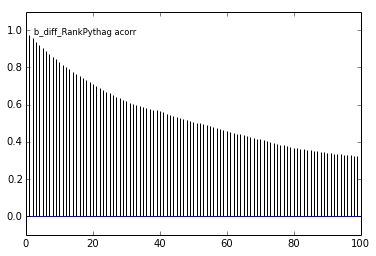

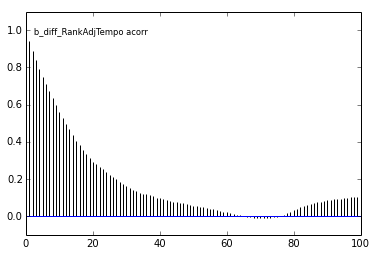

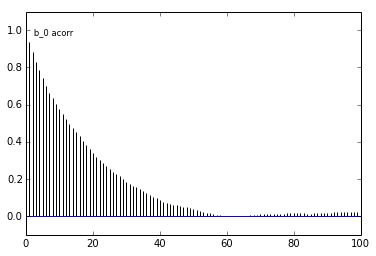

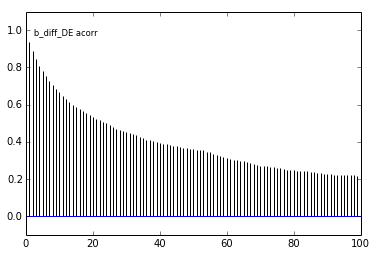

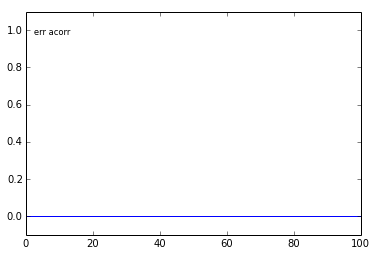

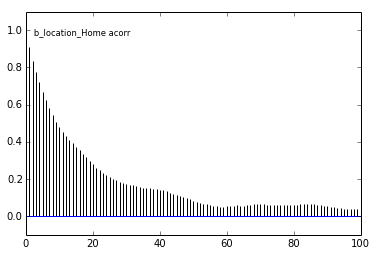

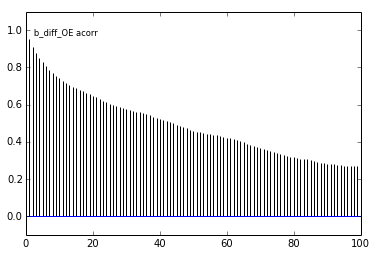

In [11]:
# No thinning
pymc.Matplot.autocorrelation(model_mcmc)

Plotting b_diff_RankAdjTempo
Plotting b_0
Plotting b_diff_RankPythag
Plotting b_diff_OE
Plotting err
Plotting b_diff_DE
Plotting b_location_Home


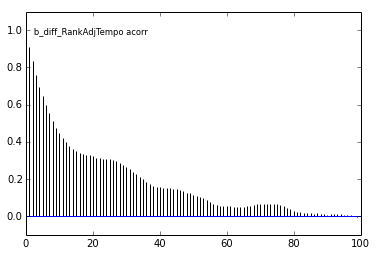

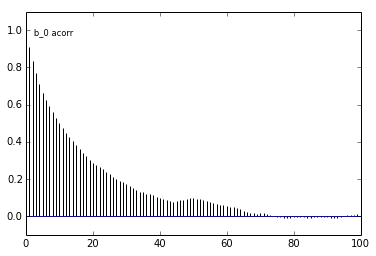

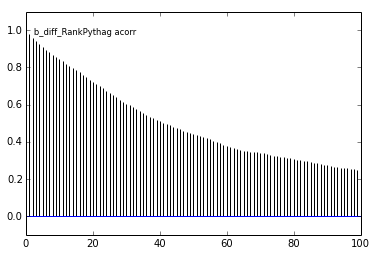

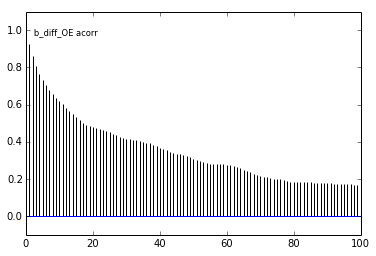

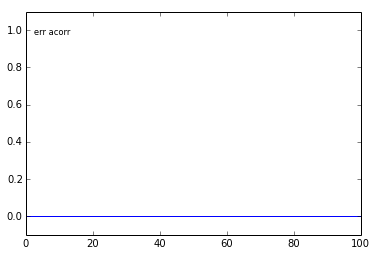

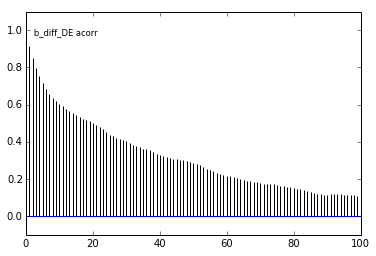

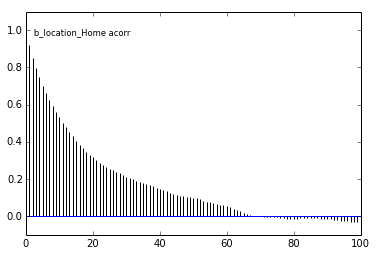

In [17]:
# No thinning - changed proposal to 10
# Correlation went down
pymc.Matplot.autocorrelation(model_mcmc)

Plotting b_diff_RankPythag
Plotting b_diff_RankAdjTempo
Plotting b_0
Plotting b_diff_DE
Plotting err
Plotting b_location_Home
Plotting b_diff_OE


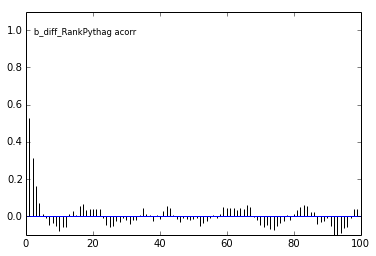

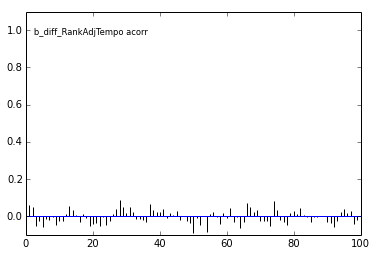

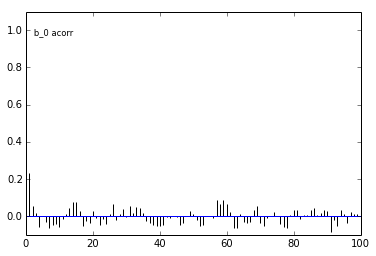

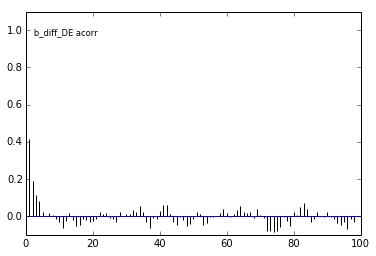

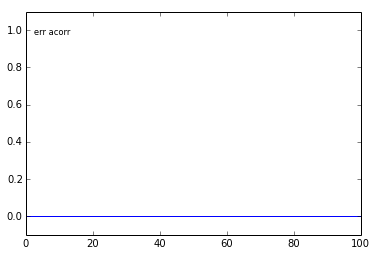

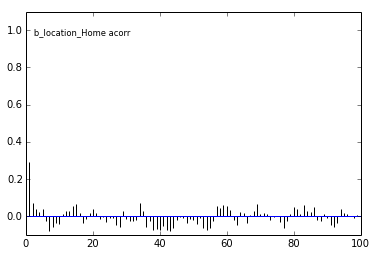

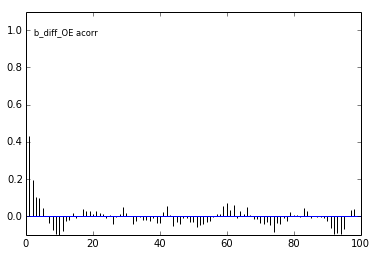

In [34]:
# With Thinning!
pymc.Matplot.autocorrelation(model_mcmc)

location_Home
diff_RankAdjTempo
diff_OE
diff_DE
diff_RankPythag


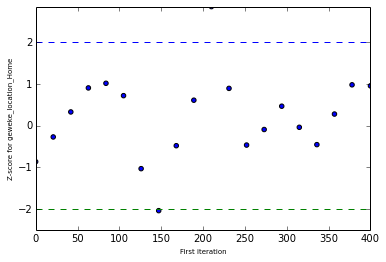

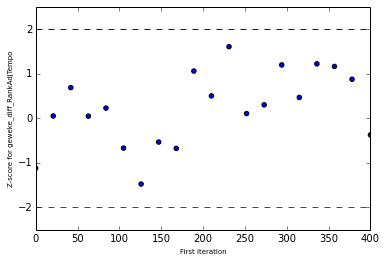

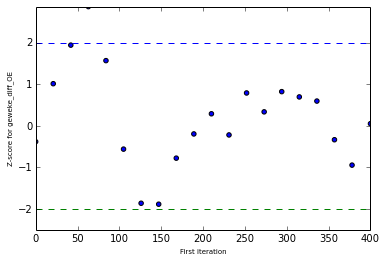

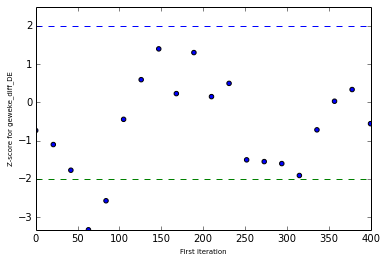

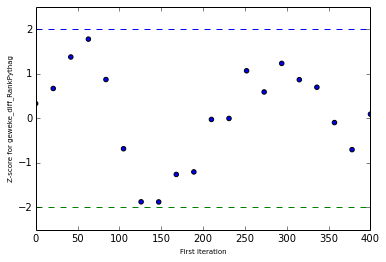

In [35]:
# Geweke Test
for feature in features:
    print feature
    scores = pymc.geweke(model_mcmc.trace('b_'+feature)[:])
    pymc.Matplot.geweke_plot(scores, name = 'geweke_'+feature)

In [38]:
# Display means
model_means = bayes_lr.mcmc_trace_means(model_mcmc, [str(0)]+ features, printMeans = True)

b_0 -0.45246132388
b_location_Home 1.11301838402
b_diff_RankAdjTempo -0.000191543274061
b_diff_OE 0.0198983211091
b_diff_DE -0.0241150127675
b_diff_RankPythag -0.0131312440093


In [12]:
# Display means
# from changing proposals
model_means = bayes_lr.mcmc_trace_means(model_mcmc, [str(0)]+ features, printMeans = True)

b_0 -0.452691422508
b_location_Home 1.11335972994
b_diff_RankAdjTempo -0.000177097190353
b_diff_OE 0.0199200495776
b_diff_DE -0.0245691767059
b_diff_RankPythag -0.0130941131334


In [46]:
# Cross validation
bayes_lr.mcmc_xval(games_2014,features,5,10)

 [-----------------100%-----------------] 10000 of 10000 complete in 13.8 sec

0.76730448128330786

In [62]:
# Set priors
# Display means
# from changing proposals
model_means = bayes_lr.mcmc_trace_means(model_mcmc, [str(0)]+ features, printMeans = True)

b_0 -0.454350527116
b_location_Home 1.11774172386
b_diff_RankAdjTempo -0.000201479451262
b_diff_OE 0.0220827814131
b_diff_DE -0.0266910335676
b_diff_RankPythag -0.0128597902293


In [73]:
# Cross validation
bayes_lr.mcmc_xval(games_2014,features,5,10, step_method_params, coef_dist_params)

{'mu': 0, 'tau': 0.0003, 'value': 0}
{'mu': 0, 'tau': 0.0003, 'value': 0}
{'mu': 0, 'tau': 3, 'value': 0}
{'mu': 0, 'tau': 3, 'value': 0}
{'mu': 0, 'tau': 0.0003, 'value': 0}
 [-----------------100%-----------------] 10000 of 10000 complete in 13.6 sec{'mu': 0, 'tau': 0.0003, 'value': 0}
{'mu': 0, 'tau': 0.0003, 'value': 0}
{'mu': 0, 'tau': 3, 'value': 0}
{'mu': 0, 'tau': 3, 'value': 0}
{'mu': 0, 'tau': 0.0003, 'value': 0}
 [-----------------100%-----------------] 10000 of 10000 complete in 13.7 sec{'mu': 0, 'tau': 0.0003, 'value': 0}
{'mu': 0, 'tau': 0.0003, 'value': 0}
{'mu': 0, 'tau': 3, 'value': 0}
{'mu': 0, 'tau': 3, 'value': 0}
{'mu': 0, 'tau': 0.0003, 'value': 0}
 [-----------------100%-----------------] 10000 of 10000 complete in 13.6 sec{'mu': 0, 'tau': 0.0003, 'value': 0}
{'mu': 0, 'tau': 0.0003, 'value': 0}
{'mu': 0, 'tau': 3, 'value': 0}
{'mu': 0, 'tau': 3, 'value': 0}
{'mu': 0, 'tau': 0.0003, 'value': 0}
 [-----------------100%-----------------] 10000 of 10000 complete in 

array([ 0.76033689,  0.77572368,  0.77334165,  0.75234332,  0.770646  ])

In [74]:
np.mean([0.76033689,  0.77572368,  0.77334165,  0.75234332,  0.770646])

0.76647830800000005

## Predict

In [48]:
y_hat_raw, y_hat, y_hat_accuracy = game_predictions.predict_games(games_2014, model_mcmc, features, 'pp')

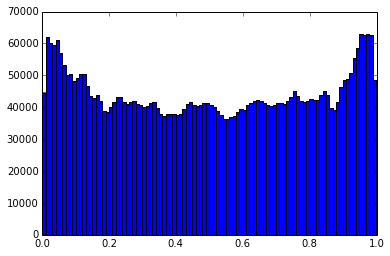

In [49]:
plt.hist(y_hat_raw.ravel(), bins=100);